In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import re

import src.utils.read_db as read

# Exploratory Data Analysis #

In [2]:
df = read.get_df()
df.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [3]:
df.shape

(10348, 14)

In [4]:
df.dtypes

ID                        float64
Age                         int64
Gender                     object
COPD History               object
Genetic Markers            object
Air Pollution Exposure     object
Last Weight                 int64
Current Weight              int64
Start Smoking              object
Stop Smoking               object
Taken Bronchodilators      object
Frequency of Tiredness     object
Dominant Hand              object
Lung Cancer Occurrence      int64
dtype: object

## Target Distribution ##

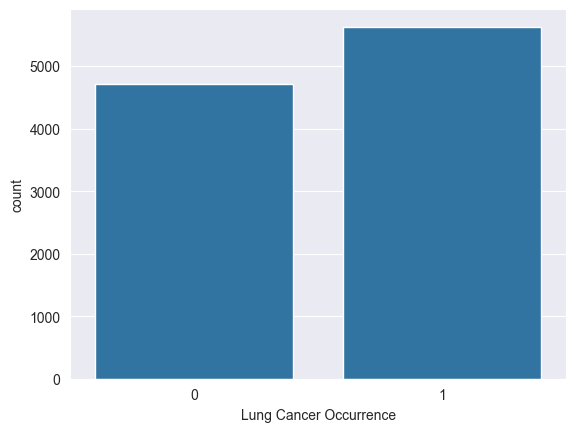

In [5]:
sns.countplot(x = df['Lung Cancer Occurrence'])
plt.show()

In [6]:
print(f"Lung Cancer Occurrence value 0 :{np.sum(df['Lung Cancer Occurrence'] == 0)/df.shape[0]:.2%}")
print(f"Lung Cancer Occurrence value 1 :{np.sum(df['Lung Cancer Occurrence'] == 1)/df.shape[0]:.2%}")

Lung Cancer Occurrence value 0 :45.59%
Lung Cancer Occurrence value 1 :54.41%


**Observation**

Target distribution seems fairly balanced.

In [7]:
def explore_uniques(df, features):
    """Prints analysis of unique values for features in a dataframe"""
    table = []
    
    for feature in features:
        uniques = df[feature].unique()
        unique_count = len(uniques)
        if unique_count > 10:
            uniques_to_display = uniques[0:10]
        else:
            uniques_to_display = uniques
        table.append([feature, type(uniques[0]), unique_count, uniques_to_display])
    
    print(tabulate(table, headers=["Feature", "Type", "Unique count", "Unique values (max 10)"]))

In [8]:
features = df.columns.tolist()
features.remove('ID')
features.remove('Lung Cancer Occurrence')
print(features)

['Age', 'Gender', 'COPD History', 'Genetic Markers', 'Air Pollution Exposure', 'Last Weight', 'Current Weight', 'Start Smoking', 'Stop Smoking', 'Taken Bronchodilators', 'Frequency of Tiredness', 'Dominant Hand']


In [9]:
numeric_features = ['Age', 'Last Weight', 'Current Weight']
year_features = ['Start Smoking', 'Stop Smoking']

In [10]:
categorical_features = []
for feature in features:
    if (feature not in numeric_features) and (feature not in year_features):
        categorical_features.append(feature)
print(categorical_features)

['Gender', 'COPD History', 'Genetic Markers', 'Air Pollution Exposure', 'Taken Bronchodilators', 'Frequency of Tiredness', 'Dominant Hand']


In [11]:
explore_uniques(df, features)

Feature                 Type                     Unique count  Unique values (max 10)
----------------------  ---------------------  --------------  ------------------------------------------------------------------------
Age                     <class 'numpy.int64'>             157  [42 72 65 67 54 49 57 50 68 48]
Gender                  <class 'str'>                       5  ['Male' 'MALE' 'Female' 'FEMALE' 'NAN']
COPD History            <class 'str'>                       3  ['No' 'Yes' None]
Genetic Markers         <class 'str'>                       2  ['Not Present' 'Present']
Air Pollution Exposure  <class 'str'>                       4  ['Medium' 'High' 'Low' None]
Last Weight             <class 'numpy.int64'>              56  [73 50 65 69 46 67 91 86 45 97]
Current Weight          <class 'numpy.int64'>              80  [69 42 75 58 40 60 95 80 46 96]
Start Smoking           <class 'str'>                      97  ['2015' '2006' '1998' '2011' '1994' '2001' '1982' '1996' '1959' '

## Data Dictionary ##
1. Age: age in years
2. Gender: sex
    - Male
    - Female
    - NAN
3. COPD History: history of Chronic Obstructive Pulmonary Disease
    - Yes
    - No
    - None
4. Genetic Markers: genetic markers presence known to increase risk
    - Present
    - Not Present
5. Air Pollution Exposure: Level of air pollution exposure in daily life
    - Low
    - Medium
    - High
    - None
6. Last Weight: last officially recorded weight
7. Current Weight: current officially recorded weight
8. Start Smoking: year patient starts smoking.
    - Year
    - Not applicable
9. Stop Smoking: year patient stops smoking
    - Year
    - Not applicable
    - still smoking
10. Taken Bronchodilators: previously prescribed Bron. medications
    - Yes
    - No
    - None
11. Frequency of Tiredness: Frequency of feeling tired in a day
    - High
    - Medium
    - None / Low
12. Dominant Hand: dominant hand
    - Right
    - Left
    - RightBoth


## Categorical Features ##

In [12]:
explore_uniques(df, categorical_features)

Feature                 Type             Unique count  Unique values (max 10)
----------------------  -------------  --------------  ---------------------------------------
Gender                  <class 'str'>               5  ['Male' 'MALE' 'Female' 'FEMALE' 'NAN']
COPD History            <class 'str'>               3  ['No' 'Yes' None]
Genetic Markers         <class 'str'>               2  ['Not Present' 'Present']
Air Pollution Exposure  <class 'str'>               4  ['Medium' 'High' 'Low' None]
Taken Bronchodilators   <class 'str'>               3  ['No' 'Yes' None]
Frequency of Tiredness  <class 'str'>               3  ['None / Low' 'Medium' 'High']
Dominant Hand           <class 'str'>               3  ['Right' 'Left' 'RightBoth']


In [13]:
print(f"Gender: 'nan' count = {np.sum(df['Gender'] == 'NAN')} or {np.sum(df['Gender'] == 'NAN')/df.shape[0]:.2%}")
print(f"COPD History: missing values count = {df['COPD History'].isnull().sum()} or {df['COPD History'].isnull().sum()/df.shape[0]:.2%}")
print(f"Air Pollution Exposure: missing count = {df['Air Pollution Exposure'].isnull().sum()} or {df['Air Pollution Exposure'].isnull().sum()/df.shape[0]:.2%}")
print(f"Taken Bronchodilators: missing count = {df['Taken Bronchodilators'].isnull().sum()} or {df['Taken Bronchodilators'].isnull().sum()/df.shape[0]:.2%}")

Gender: 'nan' count = 1 or 0.01%
COPD History: missing values count = 1112 or 10.75%
Air Pollution Exposure: missing count = 3 or 0.03%
Taken Bronchodilators: missing count = 1061 or 10.25%


**Observation for categorical features**
- Gender - need to handle dupes. There is only 1 'nan' value, so it can be easily cleaned up by backfill. 

These 3 categories also have missing value. This could mean that the data is unknown. No need to drop them, as they can be handled as its own category during preprocessing.
- COPD History
- Air Pollution Exposure - impact is minimal as it has only 3 values
- Taken Bronchodilators

## Numerical Features ##

In [14]:
df[numeric_features].describe()

,Age,Last Weight,Current Weight
count,10348.000000,10348.000000,10348.000000
mean,61.222748,72.401044,69.416216
std,23.708267,16.136498,16.880504
min,-104.000000,45.000000,36.000000
25%,54.000000,59.000000,56.000000
50%,64.000000,72.000000,69.000000
75%,74.000000,86.000000,82.000000
max,120.000000,100.000000,115.000000


In [15]:
df[df['Age'] < 0]

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
46,1.164738e+18,-61,Male,No,Present,High,83,68,1987,2023,No,High,Right,1
66,2.032923e+18,-69,Male,Yes,Not Present,Low,72,76,1962,1967,Yes,None / Low,Left,0
82,4.317332e+17,-64,Male,Yes,Not Present,Low,60,53,1993,2017,Yes,High,Right,0
126,2.205903e+18,-46,Male,Yes,Not Present,High,92,96,2004,2008,Yes,Medium,Right,1
243,1.631674e+18,-42,Male,Yes,Not Present,Medium,48,50,1989,2015,None,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,1.127526e+18,-69,MALE,Yes,Not Present,High,82,72,1981,2004,Yes,Medium,Right,0
10167,1.989421e+18,-71,Male,Yes,Not Present,High,77,63,2006,2010,Yes,Medium,Right,1
10252,1.684248e+18,-76,Male,Yes,Not Present,Medium,100,81,2005,2018,Yes,Medium,Right,1
10300,1.675232e+18,-61,FEMALE,Yes,Present,Medium,99,102,1974,Still Smoking,Yes,None / Low,Right,1


In [16]:
print(f"No. of patients with negative age (below zero) = {np.sum(df['Age'] < 0)}")

No. of patients with negative age (below zero) = 229


**Observation on Age** 

There are 229 data with negative Age. Could it be because of input mistake? (e.g. -40 should have been 40 instead). 
Investigating further below -

In [17]:
print(f"No. of patients with age less than -99 = {np.sum(df['Age'] < -99)}")
print(f"No. of patients with age > 99 = {np.sum(df['Age'] > 99)}")

No. of patients with age less than -99 = 4
No. of patients with age > 99 = 60


In [18]:
df.iloc[9550, :]

ID                        2204817437817103872.0
Age                                         -43
Gender                                   Female
COPD History                                 No
Genetic Markers                         Present
Air Pollution Exposure                     High
Last Weight                                  97
Current Weight                              100
Start Smoking                              1981
Stop Smoking                               1992
Taken Bronchodilators                        No
Frequency of Tiredness               None / Low
Dominant Hand                         RightBoth
Lung Cancer Occurrence                        0
Name: 9550, dtype: object

In [19]:
def create_age_feature(row):
    """
    Clean the Age feature, by separating all positive and all negative values
    
    New Engineered features
    - pos_Age: Age values, positive
    - neg_Age: Age values which are negative and invalid
    """
    age = row['Age']
    if age < 0:
        row['neg_Age'] = age
    else:
        row['pos_Age'] = age
    return row

df_clean = df.apply(create_age_feature, axis='columns')
df_clean.head()

,Age,Air Pollution Exposure,COPD History,Current Weight,Dominant Hand,Frequency of Tiredness,Gender,Genetic Markers,ID,Last Weight,Lung Cancer Occurrence,Start Smoking,Stop Smoking,Taken Bronchodilators,neg_Age,pos_Age
0,42,Medium,No,69,Right,None / Low,Male,Not Present,1.468154e+16,73,1,2015,2020,No,NaN,42.0
1,72,High,Yes,42,Right,Medium,Male,Not Present,1.271684e+18,50,1,2006,2012,Yes,NaN,72.0
2,65,Low,Yes,75,Right,None / Low,Male,Not Present,1.708068e+18,65,0,1998,Still Smoking,Yes,NaN,65.0
3,67,High,No,58,Right,None / Low,Male,Not Present,3.555829e+17,69,1,2011,2014,No,NaN,67.0
4,54,Medium,Yes,40,Right,None / Low,Male,Not Present,1.684598e+18,46,0,1994,2017,Yes,NaN,54.0


In [20]:
df_clean['neg_Age'].describe()

count    229.000000
mean     -64.585153
std       14.869253
min     -104.000000
25%      -74.000000
50%      -65.000000
75%      -54.000000
max      -30.000000
Name: neg_Age, dtype: float64

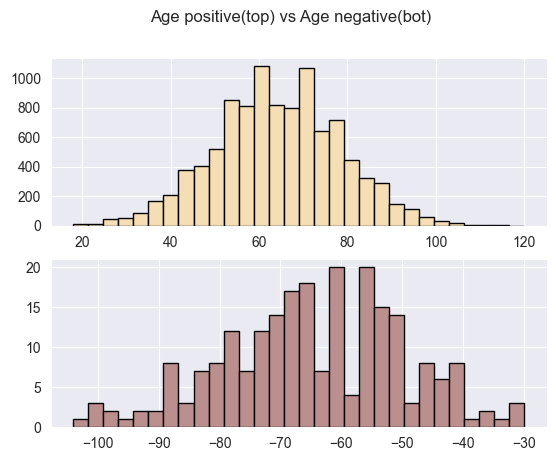

In [21]:
pos_ages = df_clean['pos_Age'].tolist()
neg_ages = df_clean['neg_Age'].tolist()

fig, ax = plt.subplots(2, 1)
fig.suptitle('Age positive(top) vs Age negative(bot)')
ax[0].hist(pos_ages, bins=30, color='wheat', edgecolor='black');
ax[1].hist(neg_ages, bins=30, color='rosybrown', edgecolor='black');

**Final Observation on Age**

Negative Age is likely **not** an input mistake.
- there are 4 patients with age below -99, while there are 60 patients above age 99. 
- For index 9550, there is an age -43. Assuming age is positive 43, the patient's birth year is 1981. As smoking year is 1981, the patient started smoking soon after birth. This data is likely wrong. 

Negative Age is likely **not** a placeholder value. (e.g. 999)
- the distribution of negative Age values is wide

Hence, it is likely that data with negative age are invalid.

**Action** Drop the invalid ages. 229 datapoints would be dropped.

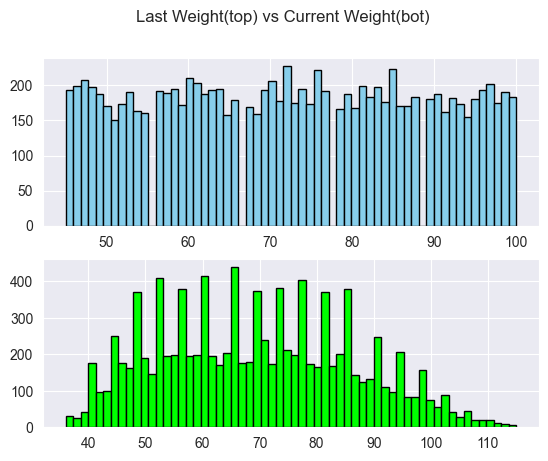

In [22]:
lweights = df_clean['Last Weight'].tolist()
cweights = df_clean['Current Weight'].tolist()

fig, ax = plt.subplots(2, 1)
fig.suptitle('Last Weight(top) vs Current Weight(bot)')
ax[0].hist(lweights, bins=60, color='skyblue', edgecolor='black');
ax[1].hist(cweights, bins=60, color='lime', edgecolor='black');

**Observation on Weight**

- Current Weight looks typical, but Last Weight looks different - it might be synthetic data.

## Year Features ##

In [23]:
df_clean[year_features].describe()

,Start Smoking,Stop Smoking
count,10348,10348
unique,97,84
top,Not Applicable,Still Smoking
freq,672,2055


In [24]:
def match_year_format(str):
    pattern = r'^(19|20)\d\d$'
    if re.match(pattern, str):
        return True
    else:
        return False
        
        
def verify_year_format(df, feature_name):    
    valid_years = []
    invalid_years = []
    year_data = df[feature_name].tolist()
    for year in year_data:
        if match_year_format(year):
            valid_years.append(year)
        else:
            invalid_years.append(year)
            
    print(f"{feature_name}: No. of valid years found: {len(valid_years)}. No. of invalid formats found: {len(invalid_years)} ")
    print(f"All the unique invalid values are - {set(invalid_years)}")
    print("Ensure that all values are verified:")
    print(f"  {feature_name}: no. of valid_years - no. of invalid_years = {df[feature_name].count() - len(valid_years) - len(invalid_years)}")

In [25]:
verify_year_format(df_clean, 'Start Smoking')

Start Smoking: No. of valid years found: 9676. No. of invalid formats found: 672 
All the unique invalid values are - {'Not Applicable'}
Ensure that all values are verified:
  Start Smoking: no. of valid_years - no. of invalid_years = 0


In [26]:
verify_year_format(df_clean, 'Stop Smoking')

Stop Smoking: No. of valid years found: 7621. No. of invalid formats found: 2727 
All the unique invalid values are - {'Still Smoking', 'Not Applicable'}
Ensure that all values are verified:
  Stop Smoking: no. of valid_years - no. of invalid_years = 0


In [27]:
## check start smoking = Not Applicable, is Stop Smoking also not applicable?
check_stop_smoking = df_clean['Stop Smoking'].loc[df_clean['Start Smoking'] == 'Not Applicable']
year_uniques = check_stop_smoking.unique()
print(year_uniques)

## From the result, this means that if the value for Start Smoking is 'not applicable', the value for Stop Smoking is always 'not applicable'

['Not Applicable']


In [28]:
df_clean['Start Smoking'].value_counts()

Start Smoking
Not Applicable    672
2004              187
2016              185
2012              185
1997              181
                 ... 
1934                3
1930                2
1927                2
1923                1
1929                1
Name: count, Length: 97, dtype: int64

In [29]:
df_clean['Stop Smoking'].value_counts()

Stop Smoking
Still Smoking     2055
Not Applicable     672
2023               557
2022               446
2021               387
                  ... 
1941                 1
1940                 1
1939                 1
1933                 1
1948                 1
Name: count, Length: 84, dtype: int64

**Observation for Year features**

- Start Smoking - 1 non-year value. It is 'Not Applicable'
- Stop Smoking - 2 non-year values are 'Still Smoking' and 'Not Applicable'

Both features are far too difficult to handle. 

**Action** Engineer new features for Start Smoking and Stop Smoking 


In [30]:
def create_year_features(row):
    """
    Clean the year columns for analysis - Start Smoking & Stop Smoking
    
    New Engineered features
    - smoker_history:         1 or 0
    - smoker_stopped_smoking: 1 or 0
    - smoker_still_smoking:   1 or 0
    - total_years_smoked      years integer
    """
    
    latest_year = 2024
    smoker_history = 0
    smoker_stopped_smoking = 0
    smoker_still_smoking = 0
    
    if match_year_format(row['Start Smoking']):
        year_start_smoking = int(row['Start Smoking'])
        smoker_history = 1
    elif row['Start Smoking'] == 'Not Applicable':
        smoker_history = 0
    
    if match_year_format(row['Stop Smoking']):
        year_stop_smoking = int(row['Stop Smoking'])
        smoker_stopped_smoking = 1
        smoker_still_smoking = 0
    elif row['Stop Smoking'] == 'Still Smoking':
        smoker_stopped_smoking = 0
        smoker_still_smoking = 1
    
    if smoker_history == 1 and smoker_stopped_smoking == 1:
        total_years_smoked =  max(year_stop_smoking - year_start_smoking, 1)
    elif smoker_history == 1 and smoker_still_smoking == 1:
        total_years_smoked =  max(latest_year - year_start_smoking, 1)
    elif smoker_history == 0:
        total_years_smoked = 0
    
    
    row['smoker_history'] = smoker_history
    row['smoker_stopped_smoking'] = smoker_stopped_smoking
    row['smoker_still_smoking'] =  smoker_still_smoking
    row['total_years_smoked'] = total_years_smoked
    
    return row

In [31]:
df_clean = df_clean.apply(create_year_features, axis='columns')

In [32]:
df_clean.head()

,Age,Air Pollution Exposure,COPD History,Current Weight,Dominant Hand,Frequency of Tiredness,Gender,Genetic Markers,ID,Last Weight,Lung Cancer Occurrence,Start Smoking,Stop Smoking,Taken Bronchodilators,neg_Age,pos_Age,smoker_history,smoker_stopped_smoking,smoker_still_smoking,total_years_smoked
0,42,Medium,No,69,Right,None / Low,Male,Not Present,1.468154e+16,73,1,2015,2020,No,NaN,42.0,1,1,0,5
1,72,High,Yes,42,Right,Medium,Male,Not Present,1.271684e+18,50,1,2006,2012,Yes,NaN,72.0,1,1,0,6
2,65,Low,Yes,75,Right,None / Low,Male,Not Present,1.708068e+18,65,0,1998,Still Smoking,Yes,NaN,65.0,1,0,1,26
3,67,High,No,58,Right,None / Low,Male,Not Present,3.555829e+17,69,1,2011,2014,No,NaN,67.0,1,1,0,3
4,54,Medium,Yes,40,Right,None / Low,Male,Not Present,1.684598e+18,46,0,1994,2017,Yes,NaN,54.0,1,1,0,23


## Exploring Features/Target ##

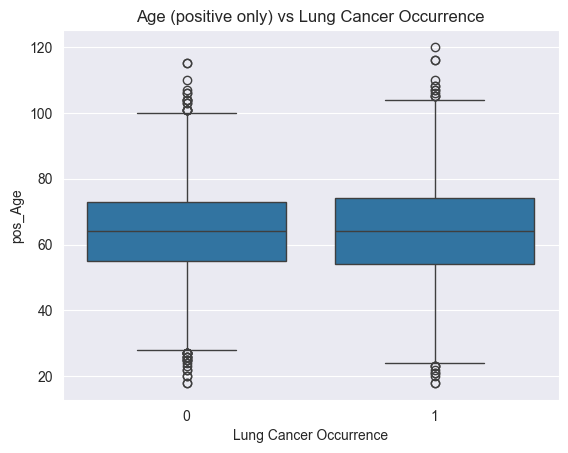

In [33]:
sns.boxplot(x='Lung Cancer Occurrence', y='pos_Age', data=df_clean)
plt.title('Age (positive only) vs Lung Cancer Occurrence')
plt.show()

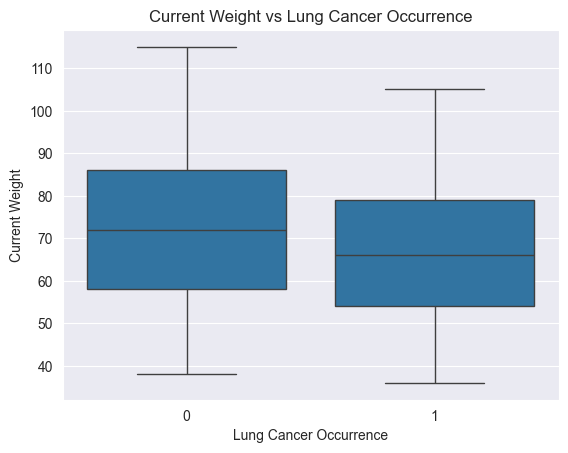

In [34]:
sns.boxplot(x='Lung Cancer Occurrence', y='Current Weight', data=df_clean)
plt.title('Current Weight vs Lung Cancer Occurrence')
plt.show()

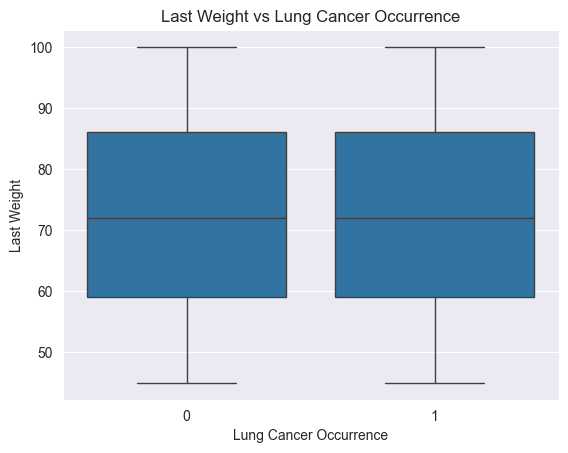

In [35]:
sns.boxplot(x='Lung Cancer Occurrence', y='Last Weight', data=df_clean)
plt.title('Last Weight vs Lung Cancer Occurrence')
plt.show()

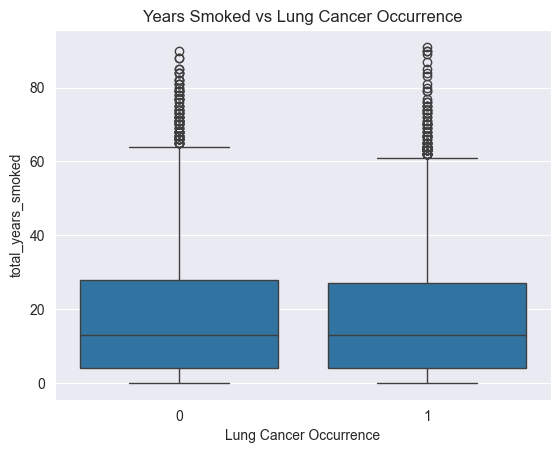

In [36]:
sns.boxplot(x='Lung Cancer Occurrence', y='total_years_smoked', data=df_clean)
plt.title('Years Smoked vs Lung Cancer Occurrence')
plt.show()

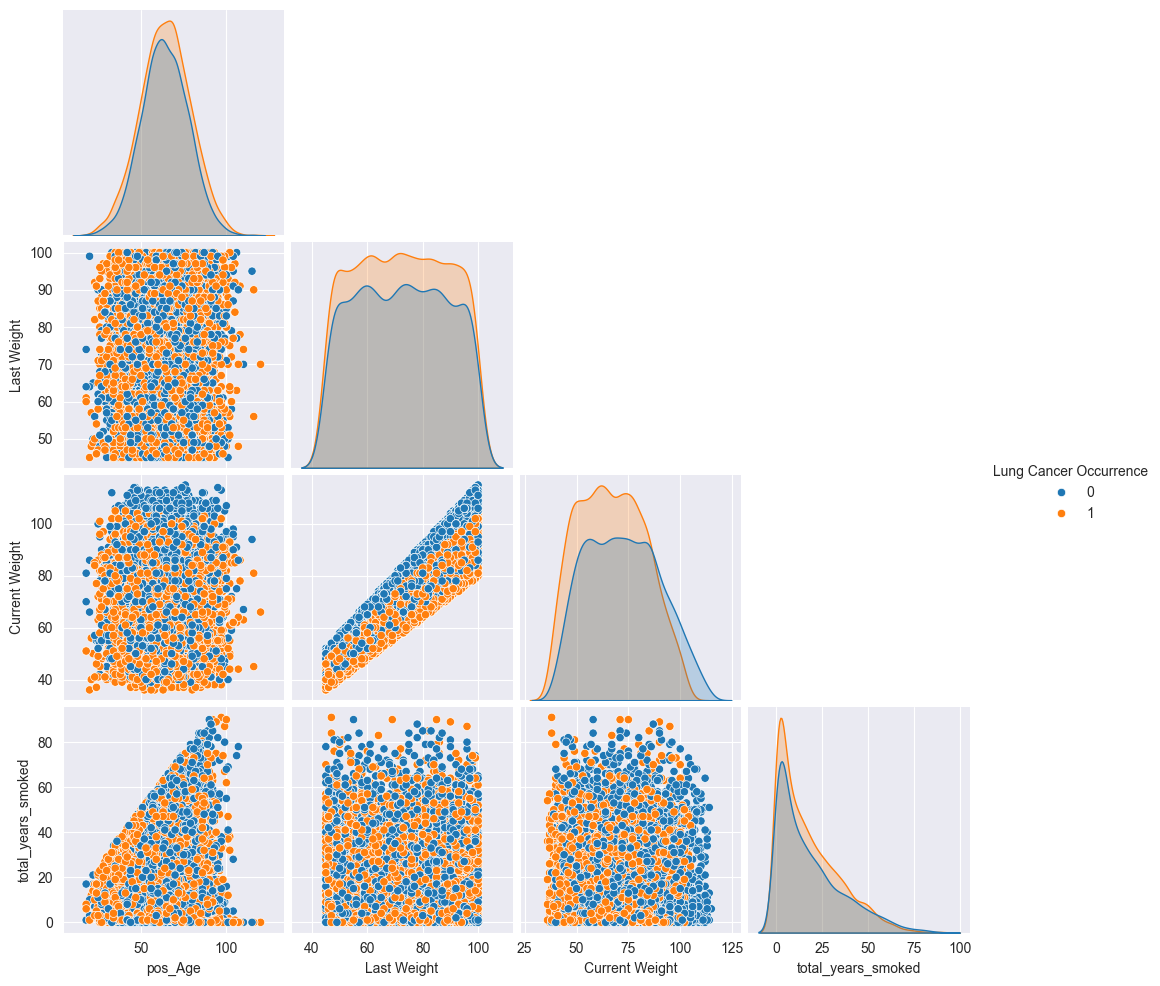

In [37]:
pairplot_cols = ['pos_Age', 'Last Weight', 'Current Weight', 'Lung Cancer Occurrence', 'total_years_smoked']
g = sns.pairplot(df_clean[pairplot_cols], hue='Lung Cancer Occurrence', corner=True)

**Observation on Numeric features vs Target**

- Age and Gender vs Target have similar IQR and symmetry.
- Current Weight vs Target - it has a distinct skew and different IQR. 
- Total years smoked vs target - large skew left.
- Current weight and Last weight are strongly linear related to each other. This might mean synthetic data is added. 


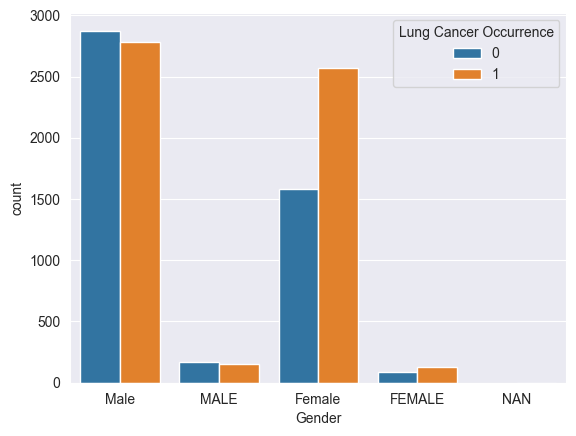

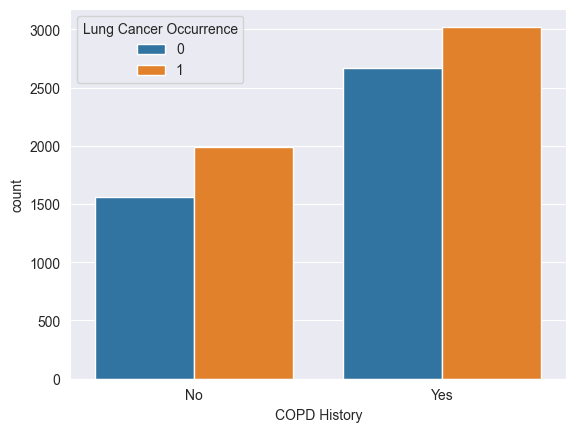

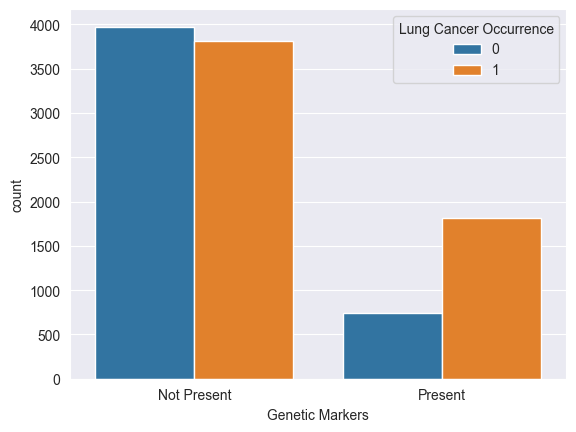

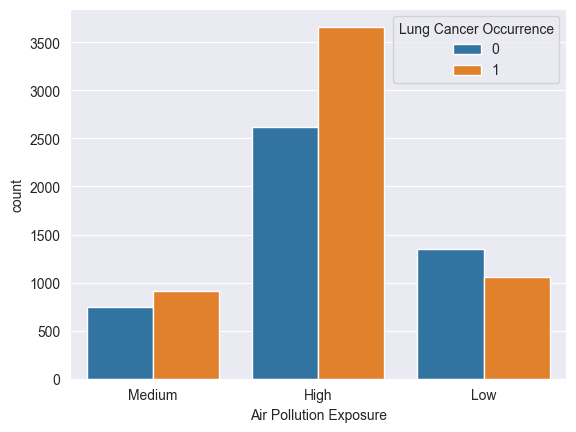

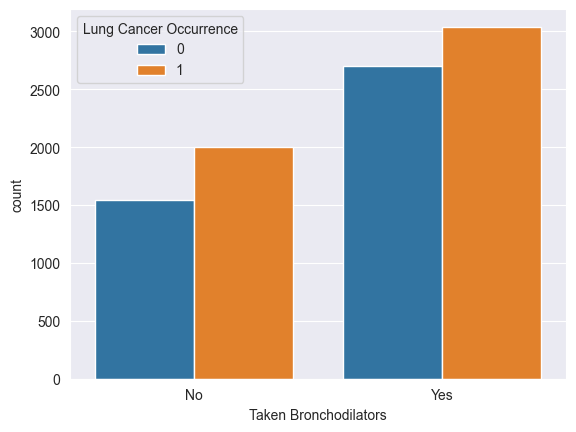

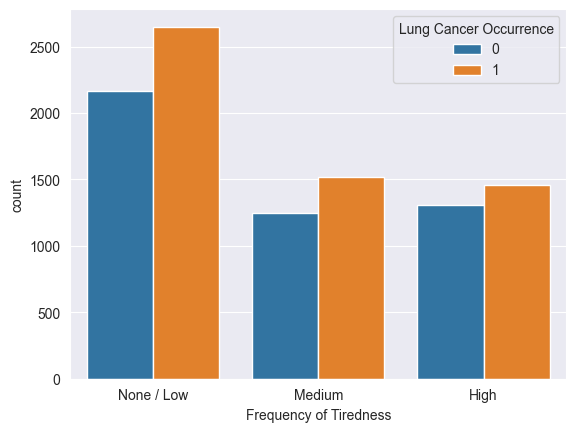

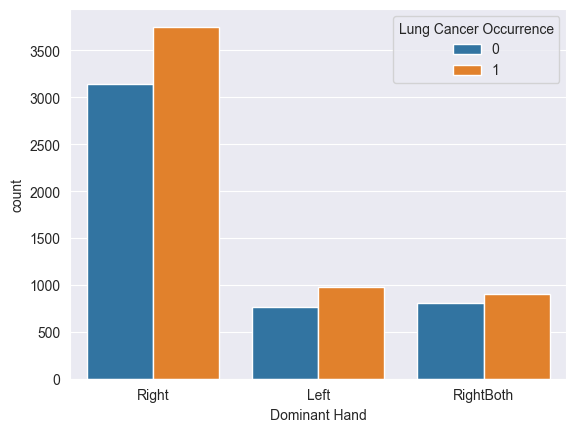

In [38]:
for category in categorical_features:
    sns.countplot(df_clean, x=category, hue='Lung Cancer Occurrence')
    plt.show()

**Observation on Categorical Features vs Target**

- All categorical features show possible linear relation with the Target.

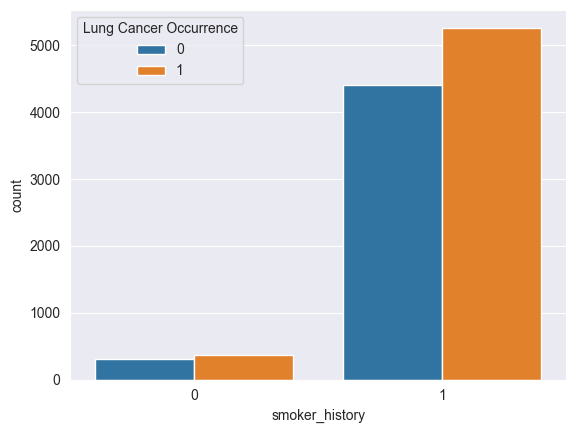

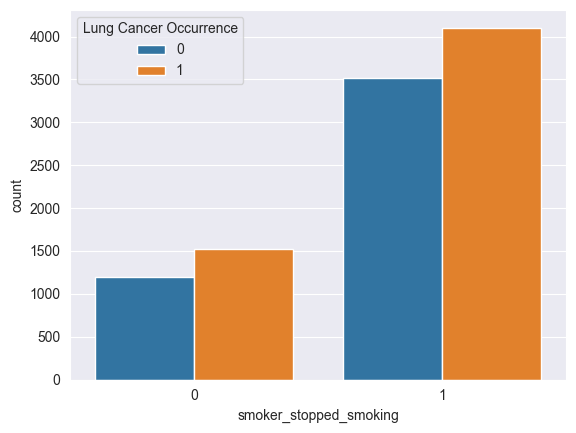

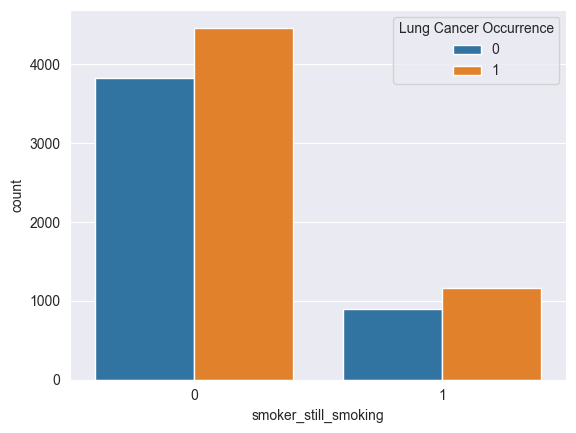

In [39]:
engineered_features = ['smoker_history', 'smoker_stopped_smoking', 'smoker_still_smoking']
for feature in engineered_features:
    sns.countplot(df_clean, x=feature, hue='Lung Cancer Occurrence')
    plt.show()

**Observation on Engineered Smoking features vs Target**

- Smoker history seems to show strong relation with Target.

## EDA Summary ##

**Data Size**: 10348 points, of which 229 datapoints are invalid (negative Age)

**Features in data:**
 - Numerical features = 3 
 - Year features = 2
 - Categorical features = 7

**Proposed Engineered Features:**
  - 1 numerical feature (total years smoked)
  - 3 categorical feature (smoking history; smoker stopped smoking; smoker still smoking)

**Target:** Fairly balanced, not skewed. Lung Cancer 54.41%, non Lung Cancer 45.59%.

**Observed relation with Target:**
 - Generally, all features show relation with target. Especially categorical features.

**Cleaning is required for Age and Gender:**
 - Age: to drop datapoints with negative values, as examples seem invalid. They do not look like placeholder values.
 - Gender: to clean up dupes (e.g. MALE and male). 1 'NAN' value to be backfilled

**Missing values**
- Air Pollution Exposure: missing count = 3 or 0.03% -> as there are only 3 missing values, it can be easily handled with backfill. 
- COPD History: missing values count = 1112 or 10.75%
- Taken Bronchodilators: missing count = 1061 or 10.25%

**Pre-processing and feature engineering is required for 'Start Smoking' and 'Stop Smoking':**

This is because these features contain both integer year values, together with categorical values 'Not Applicable', and 'Still Smoking'.

As mentioned above, the engineered features are:
- 1 numerical feature (total years smoked)
- 3 categorical feature (smoking history; smoker stopped smoking; smoker still smoking)

## Potential Models ##

1. Logistic Regression Model - as this is a binary classification task
2. Neural Network with logistic regression model - as this is a binary classification task